In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import logging

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>]], dtype=object)

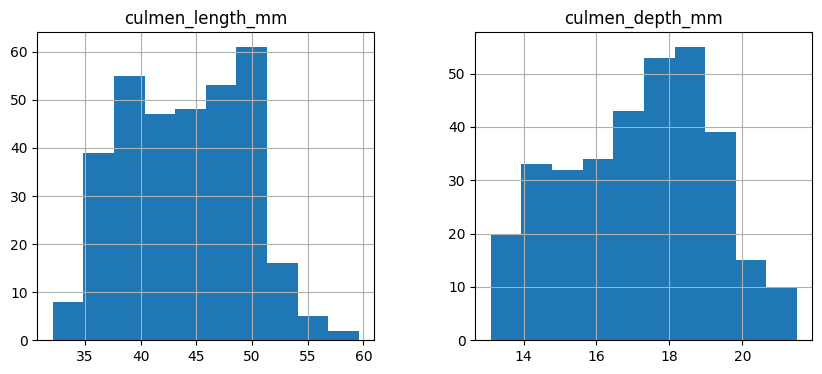

In [4]:
df.isnull().sum()
dataset = df.dropna()
dataset = dataset[["species", "culmen_length_mm","culmen_depth_mm"]]
dataset.hist(figsize=(10, 4))

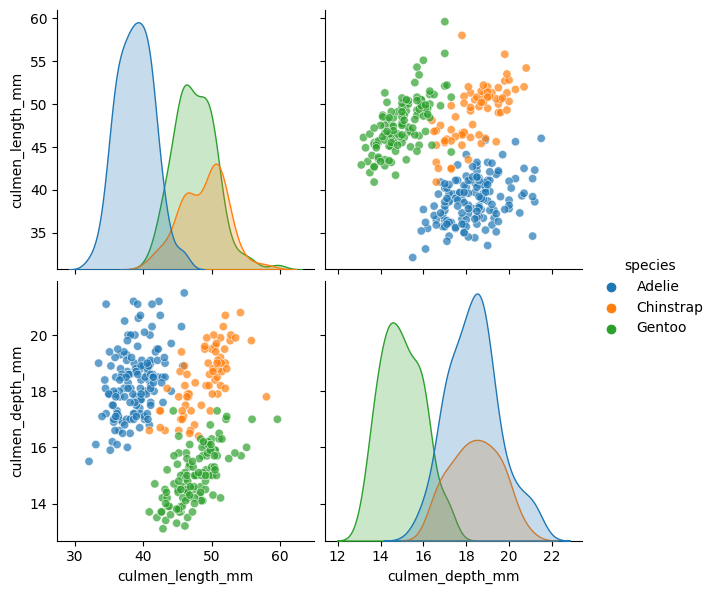

In [5]:
sns.pairplot(data=dataset,
             hue="species",
             vars=["culmen_length_mm", "culmen_depth_mm"],
             diag_kind="kde",
             plot_kws={"alpha": 0.7}, 
             height=3);

In [13]:
data = df.dropna()
data = data.rename(columns = {"culmen_length_mm": "culmen_length",
                       "culmen_depth_mm": "culmen_depth",
                       "flipper_length_mm": "flipper_length",
                       "body_mass_g": "body_mass"})

numerical_features = ["culmen_length", "culmen_depth", "flipper_length", "body_mass"]
target = "species"
X = data[numerical_features]
y = data[target]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=82)
strategies = ["most_frequent", "prior", "stratified", "uniform", "constant"]
for strategy in strategies:
    model = DummyClassifier(strategy=strategy).fit(X_train, y_train)
    mae_val = model.score(X_test, y_test)
    
    print(f"Score - {strategy}: {mae_val}")
    
svc_acc = SVC().fit(X_train, y_train).score(X_test, y_test)
print(f"Score SVM: {svc_acc}")


Score - most_frequent: 0.4642857142857143
Score - prior: 0.4642857142857143
Score - stratified: 0.4642857142857143
Score - uniform: 0.23809523809523808


ValueError: Constant target value has to be specified when the constant strategy is used.